# Creating an ANN Using PyTorch

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#clearly no null values.

In [5]:
# in order to do pair-plot we can use seaborn:
# for that we need to change the hue = "outcome" in categorical feature(string)


In [6]:
# df['Outcome'] = np.where(df['Outcome']==1,"Diabetic","No Diabetic")

# Separating the independent and dependent features

In [7]:
y = df['Outcome'].values
x = df.drop('Outcome',axis=1).values


In [9]:
x.shape,y.shape

((768, 8), (768,))

# Train-Test split

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# Converting these data into Tensors

In [103]:
# importing libraries from pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [104]:
# Creating tensors
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [105]:
## creating the model with pytorch
# for that we need to declare a class and it must inherit the nn.Module

In [106]:
df.shape
# 8 independent features /input layer.

(768, 9)

__inside__ ```__init__()``` 
1. we used self to access all properties of its class
2. We used keyword arguments to declare the number of input, hidden, output features.
3. Output features = 2 --> we'll find the probability of each class: categorical_crossentropy.
4. ```super().__init__()``` to get inherit everything from nn.Module class


__inside__ ```forward()```
1. we passed x which is the input features which will be used to find the gradients.
2. .F function contains all the activaition functions like ```sigmoid```, ```relu```.
3. Applied the relu activation function on fully-connected layer1 ( input-hidden1)
4. On the output of the first layer,again applied relu.
5. Finally fed the output of previous layers to output layer and returned it.

In [135]:
# here we are inheriting everything from nn.Module class
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connect1 = nn.Linear(input_features,hidden1)
        self.f_connect2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
        
    #method:
    def forward(self,x):
        x = F.relu(self.f_connect1(x))
        x = F.relu(self.f_connect2(x))
        x = self.out(x)
        return x

In [136]:
## instantiate ANN_Model
# so that same weights get applied.
torch.manual_seed(20) 
model = ANN_Model()

In [137]:
model.parameters
# model parameters() are generators and they get passed one-by-one.

<bound method Module.parameters of ANN_Model(
  (f_connect1): Linear(in_features=8, out_features=20, bias=True)
  (f_connect2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [138]:
# BackWard propagation: Loss_function, Optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

Now our ```Model```, ```Loss_function```,```Optimizer``` are ready.
We now need to trigger them

What We did below:
1. For performed forward<->backward prop for 100 iterations.
2. Called the ```forward()`` method of ```model()``` with ```x_train``` as input.
3. ....
4. Reset the gradient = 0, before calculating new gradient for current iterations.
5. Computed new_gradients with respect to the model parameters.
6. Called ```.step()``` function to update the model params based on the computed gradients.

In [139]:
epochs = 100
final_losses=[]
for i in range(epochs):
    y_pred = model.forward(x_train)
    loss = loss_function(y_pred,y_train)
    final_losses.append(loss.item())
    if i%10 == 0:
        print("Epoch number is:{} and loss is: {}".format(i+1,loss.item()))
    # grad=0, reset to 0,before calculating new grad in current epoch.
    optimizer.zero_grad()
    
    #backward function: compute grad wrt model parameters.
    loss.backward()
    # step function called to update the model params based on computed grads.
    optimizer.step()

Epoch number is:1 and loss is: 3.4572105407714844
Epoch number is:11 and loss is: 0.8019207715988159
Epoch number is:21 and loss is: 0.609032154083252
Epoch number is:31 and loss is: 0.5917771458625793
Epoch number is:41 and loss is: 0.5679708123207092
Epoch number is:51 and loss is: 0.5529041886329651
Epoch number is:61 and loss is: 0.5410095453262329
Epoch number is:71 and loss is: 0.5310389995574951
Epoch number is:81 and loss is: 0.5220361351966858
Epoch number is:91 and loss is: 0.5135971903800964


# plotting the loss function

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
import numpy as np

# Mistake

While appending the losses to final_loss I was just using:
    ```final_losses.apeend(loss)``` instead of ```loss.item()```.
    So the final list was also having the gradient history. And I was 
    unable to plot it direclty. So using .item() we just take the ```Scalar``` value in the list

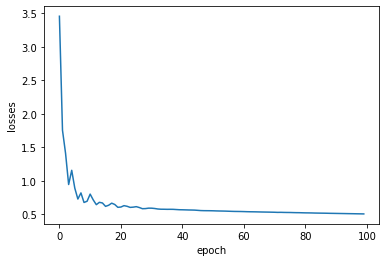

In [143]:
plt.plot(range(epochs),final_losses)
plt.ylabel('losses')
plt.xlabel("epoch")
plt.show()

In [144]:
# Clearly we see that the Loss is decreasing

# Prediction on x_test data

In [153]:
with torch.no_grad(): #while prediciton, we don't require the gradients.
    for i,data in enumerate(x_test): # for all the test data.
        if i%10 == 0:
            print(model(data))

tensor([0.5537, 2.5778])
tensor([-0.8834, -0.5931])
tensor([1.0995, 1.1648])
tensor([0.5773, 0.0471])
tensor([ 1.1782, -0.2654])
tensor([0.7982, 1.3615])
tensor([-0.1447, -0.9190])
tensor([1.4828, 0.6052])
tensor([1.2350, 0.6157])
tensor([1.4747, 0.7296])
tensor([-0.8857, -2.5924])
tensor([1.3045, 0.2050])
tensor([1.3915, 0.6839])
tensor([-0.4651,  0.0631])
tensor([ 1.6942, -0.0674])
tensor([ 1.3332, -0.0727])


In [154]:
# but now we want to the output in terms of 0/1.

In [160]:
predictions = []
with torch.no_grad():
    for i, data in enumerate(x_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
      

In [168]:
# first N element of list = []:
N = 10
test_rest = predictions[:N]

In [169]:
test_rest

[1, 0, 0, 0, 0, 0, 1, 0, 0, 1]

In [170]:
# Checking the accuracy on the training data:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,predictions)
cm

array([[86, 21],
       [23, 24]], dtype=int64)

Text(33.0, 0.5, 'predicted value')

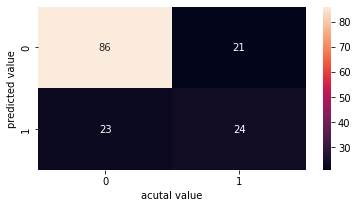

In [172]:
import seaborn as sns
plt.figure(figsize=(6,3))
sns.heatmap(cm,annot=True)
plt.xlabel('acutal value')
plt.ylabel('predicted value')

In [173]:
acc = accuracy_score(y_test,predictions)
acc

0.7142857142857143

# save the model

In [175]:
torch.save(model,'diabetes.pt')
# as pytorch file (.pt)

In [176]:
# load the file.
model = torch.load('diabetes.pt')

In [178]:
model.eval()
# we see the same model-parameters and fetures.

ANN_Model(
  (f_connect1): Linear(in_features=8, out_features=20, bias=True)
  (f_connect2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

## Prediction of new Data points

In [179]:
# taking any random row.
new_data = [6,150,72,45,0,39.6,0.627,40]

In [183]:
new_data_tens = torch.FloatTensor(new_data)

In [198]:
with torch.no_grad():
    y_prediction = model(new_data_tens)

In [200]:
y_prediction 

tensor([0.7484, 1.1948])

In [201]:
y_prediction

tensor([0.7484, 1.1948])

In [204]:
# we can also access any row data:
row_data = df.iloc[0,:-1]
lst1  = list(row_data)

In [205]:
lst1

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [206]:
# converting to tensor.
new_data = torch.tensor(lst1)

In [207]:
# prediction
with torch.no_grad():
    print(model(new_data))
    print(new_data.argmax().item())

tensor([0.7484, 1.1948])
1


In [208]:
# 1st class is the output, means person is diabetic.